In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm
import scipy as sp
import itertools
from scipy.stats import binom
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')
MyColors = ["#0078D7", "#E74856", "#FFB900", "#10893E", "#B146C2",
"#00B7C3", "#E3008C", "#FF8C00", "#00CC6A", "#6B69D6",
"#0099BC", "#C30052", "#F7630C", "#00B294", "#8764B8"]

In [16]:
T = 15
LIST_T = np.arange(0, T+0.5, 0.5).tolist()

In [25]:
vol = pd.read_csv(r"C:\Users\yahsk\Desktop\Q2\Fixed income markets\ALL HW AND SOLUTIONS except 8\Homework_export 6\Homework 6\vol.csv", header=None, names=["vol"])["vol"]
vol = pd.concat([pd.Series({0:0}), vol])
vol.index = LIST_T[:len(vol)]  # This line sets the index to match the length of 'vol'


In [20]:
df = pd.read_csv(r"C:\Users\yahsk\Desktop\Q2\Fixed income markets\ALL HW AND SOLUTIONS except 8\Homework_export 6\Homework 6\discount.csv", header=None, names=["df"])["df"]
df.index = LIST_T[1:]

In [26]:
tree_r = pd.DataFrame(np.nan,
index=range(1, T*2+1),
columns=LIST_T[:len(LIST_T)-1])

In [30]:
def calc_df(r, tree_r_n, vol):
    # Set index
    t = tree_r_n.columns.max()
    t1 = t+0.5
    n = len(tree_r_n)-1
    # Set r* at maturity
    tree_r_n[t] = [r*np.exp(-2*vol*np.sqrt(0.5)*i) for i in range(0, n+1, 1)]
    # Compute discount factor
    tree_df = 1/(1+tree_r_n/2)
    # Compute casf flow tree
    tree_cf = pd.DataFrame(np.nan,
        index=range(1,n+3),
        columns=LIST_T[:(n+2)])
    tree_cf[t1] = 1
    for s in reversed(LIST_T[:n+1]):
        tree_cf[s] = (tree_df[s]*tree_cf[s+0.5]
        + tree_df[s]*tree_cf.shift(-1)[s+0.5])/2
    return tree_cf.iloc[0,0]

def obj_func(r, tree_r_n, vol):
    t = tree_r_n.columns.max()
    t1 = t+0.5
    return (calc_df(r, tree_r_n, vol)-df[t1])**2

In [31]:
for n, t in enumerate(tree_r.columns):
    list_t = LIST_T[0:(n+1)]
    tree_r_n = tree_r[list_t][0:(n+1)]
    r = sp.optimize.fsolve(obj_func, 0.01, args=(tree_r_n, vol[t]))[0]
    tree_r[t][0:(n+1)] = [r*np.exp(-2*vol[t]*np.sqrt(0.5)*i)
    for i in range(0, n+1, 1)]

In [32]:
tree_r

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5
1,0.056605,0.063270,0.072572,0.084125,0.098326,0.114152,0.129116,0.146041,0.162498,0.180818,...,0.425064,0.452156,0.479588,0.499425,0.526511,0.553723,0.581053,0.608522,0.636150,0.664007
2,NaN,0.054926,0.061245,0.069504,0.079532,0.091036,0.102679,0.115811,0.129226,0.144202,...,0.355183,0.378892,0.403017,0.421471,0.445588,0.469945,0.494537,0.519383,0.544502,0.569955
3,NaN,NaN,0.051685,0.057424,0.064330,0.072601,0.081655,0.091838,0.102767,0.115001,...,0.296791,0.317499,0.338672,0.355685,0.377102,0.398843,0.420902,0.443301,0.466057,0.489225
4,NaN,NaN,NaN,0.047444,0.052034,0.057899,0.064936,0.072828,0.081725,0.091713,...,0.247999,0.266053,0.284600,0.300168,0.319143,0.338498,0.358232,0.378364,0.398913,0.419930
5,NaN,NaN,NaN,NaN,0.042088,0.046175,0.051640,0.057752,0.064991,0.073141,...,0.207228,0.222944,0.239161,0.253315,0.270092,0.287284,0.304893,0.322940,0.341443,0.360449
6,NaN,NaN,NaN,NaN,NaN,0.036824,0.041067,0.045798,0.051684,0.058330,...,0.173160,0.186820,0.200976,0.213776,0.228580,0.243818,0.259496,0.275634,0.292252,0.309394
7,NaN,NaN,NaN,NaN,NaN,NaN,0.032658,0.036318,0.041102,0.046518,...,0.144692,0.156549,0.168888,0.180409,0.193448,0.206928,0.220858,0.235258,0.250148,0.265571
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028800,0.032686,0.037098,...,0.120905,0.131183,0.141924,0.152249,0.163716,0.175620,0.187973,0.200796,0.214110,0.227955
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025993,0.029586,...,0.101028,0.109927,0.119264,0.128485,0.138553,0.149049,0.159985,0.171382,0.183264,0.195666
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023595,...,0.084419,0.092115,0.100223,0.108430,0.117258,0.126498,0.136164,0.146278,0.156862,0.167952


In [33]:
# Compute forward curve
fwd = ((df/df.shift(-1)-1)/0.5).dropna()

In [36]:
#Compute probability tree
P = 1/2
tree_p = tree_r.copy().fillna(0)
tree_p.iloc[0,0] = 1
for t in LIST_T[1:len(LIST_T)-1]:
    tree_p[t] = tree_p[t-0.5]*P + tree_p[t-0.5].shift().fillna(0)*P

In [37]:
# Compute Expected short rate curve
fwd_exp = (tree_r*tree_p).sum()

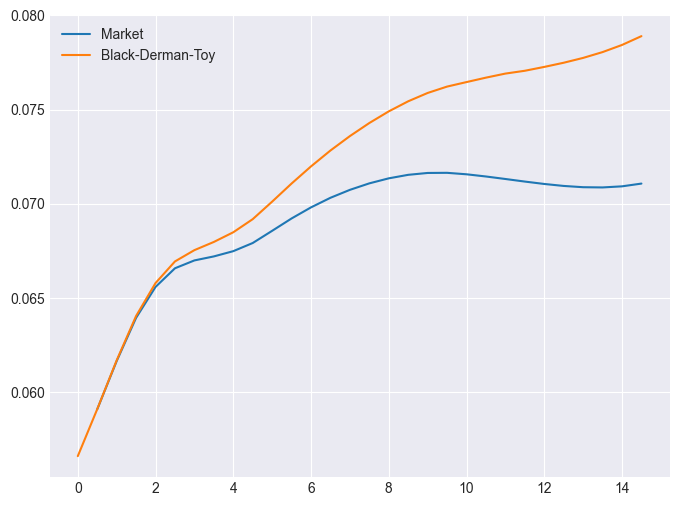

In [38]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fwd.plot(ax=ax)
fwd_exp.plot(ax=ax)
ax.legend(["Market", "Black-Derman-Toy"]);

In [41]:
# Compute the price of a bond for all 11 nodes in year 5 for a two-year bond
def nodes(K):
    # An empty vector to store the four discount factors for a certain node in␣,→year 5
    disc_vec = []
    # D(0.5)
    r = tree_r[5].dropna()[K]
    D_half = 1 / (1 + 0.5 * r)
    disc_vec.append(D_half)
    # D(1.0)
    r_u = tree_r[5.5].dropna()[K]
    r_d = tree_r[5.5].dropna()[K + 1]
    D_1 = (0.5 * (1 / (1 + r_u / 2)) + 0.5 * (1 / (1 + r_d / 2))) / (1 + 0.5 *r)
    disc_vec.append(D_1)
    # D(1.5)
    r_uu = tree_r[6].dropna()[K]
    r_ud = tree_r[6].dropna()[K + 1]
    r_dd = tree_r[6].dropna()[K + 2]
    A = (0.5 * (1 / (1 + r_uu / 2)) + 0.5 * (1 / (1 + r_ud / 2))) / (1 + 0.5 *r_u)
    B = (0.5 * (1 / (1 + r_ud / 2)) + 0.5 * (1 / (1 + r_dd / 2))) / (1 + 0.5 *r_d)
    D_oneHalf = (0.5 * A + 0.5 * B) / (1 + r / 2)
    disc_vec.append(D_oneHalf)
    # D(2.0)
    r_uuu = tree_r[6.5].dropna()[K]
    r_uud = tree_r[6.5].dropna()[K + 1]
    r_udd = tree_r[6.5].dropna()[K + 2]
    r_ddd = tree_r[6.5].dropna()[K + 3]
    C = (0.5 * (1 / (1 + r_uuu / 2)) + 0.5 * (1 / (1 + r_uud / 2))) / (1 + 0.5* r_uu)
    D = (0.5 * (1 / (1 + r_uud / 2)) + 0.5 * (1 / (1 + r_udd / 2))) / (1 + 0.5* r_ud)
    E = (0.5 * (1 / (1 + r_udd / 2)) + 0.5 * (1 / (1 + r_ddd / 2))) / (1 + 0.5* r_dd)
    F = (0.5 * C + 0.5 * D) / (1 + r_u / 2)
    G = (0.5 * D + 0.5 * E) / (1 + r_d / 2)
    D_2 = (0.5 * F + 0.5 * G) / (1 + r / 2)
    disc_vec.append(D_2)
    return disc_vec

In [43]:
# European Call Option
par = 100
c = 4
strike = 98
# Compute the price of a bond for each node
price_vec = []
for i in range(1, 12):
    price_vec.append(c / 2 * (nodes(i)[0] + nodes(i)[1] + nodes(i)[2] +
    nodes(i)[3]) + par * nodes(i)[3])
# Compute the payoff of a call option
call = price_vec - strike*np.ones(11)
call[call < 0] = 0
# Compute the value of a call option
pcall = 0
for i in range(11):
    pcall += call[i]*binom.pmf(i,10,0.5)*df[5.0]

In [44]:
pcall

0.23628422229011067